In [1]:
#Importing all the libraries that will be used
from keras.datasets import fashion_mnist
from keras.datasets import mnist
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
!pip install wandb -qq
import wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


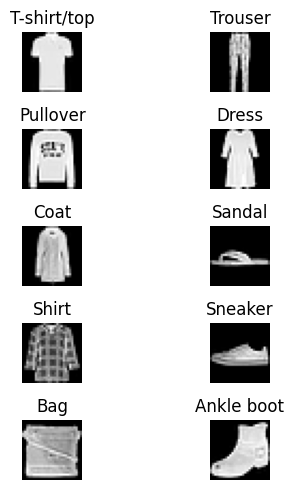

In [3]:
wandb.login(key='fbf80504ccef17f5f3b05723be7ea4caff805164')
wandb.init(project="CS23M030", name="Question_1")
#Load the fashion MNIST data

# dataset='mnist'
# if dataset=='fashion-mnist':
#   (X_train_com, Y_train_com), (X_test, Y_test) = fashion_mnist.load_data()
# else:
#   (X_train_com, Y_train_com), (X_test, Y_test) = mnist.load_data()


(X_train_com, Y_train_com), (X_test, Y_test) = fashion_mnist.load_data()
#Normalizing the data
X_train_com = X_train_com/255.0
X_test = X_test/255.0
np.random.seed(137)
encoder = OneHotEncoder()

#Splitting to get 10% data as validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train_com, Y_train_com, test_size=0.1, random_state=137)

Y_train_unencoded = Y_train
#One hot encoding of the class labels


Y_val = encoder.fit_transform(np.expand_dims(Y_val,1)).toarray()
Y_train = encoder.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_test = encoder.fit_transform(np.expand_dims(Y_test,1)).toarray()


# Defining the class labels of the 10 classess
class_labels={
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

#Let's start plotting one sample plot corressponding to each class
plt.figure(figsize=(5,5))
for i in range(10):
  plt.subplot(5,2,i+1)
  #get the first image with the i label
  img_index=next(index for index,label in enumerate(Y_train_unencoded) if label==i)
  plt.imshow(X_train[img_index],cmap='gray')
  plt.title(class_labels[i])
  plt.axis('off')
  wandb.log({"Fashion-MNIST": [wandb.Image(X_train[img_index],caption=class_labels[i])]})

plt.tight_layout()
plt.show()


wandb.finish()